In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
load_error = pd.read_csv("../src/data/load_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
pv_error = pd.read_csv("../src/data/pv_errors_date.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
load_error.head(2)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,date,rmse
0,12.90625,16.593750,8.453125,7.12500,11.65625,11.125000,8.171875,9.6875,10.250000,11.953125,...,-16.31250,-39.781250,-28.671875,-34.843750,-14.328125,-54.828125,-55.828125,-69.531250,2021-03-17 00:00:00,-40.123198
1,16.59375,8.453125,7.125000,11.65625,11.12500,8.171875,9.687500,10.2500,11.953125,14.546875,...,-39.78125,-28.671875,-34.843750,-14.328125,-54.828125,-55.828125,-69.531250,-53.921875,2021-03-17 00:10:00,-40.688503


In [573]:
N= 60
def remove_outliers(df, N, pl= 5, pu=95):
    steps = [str(i) for i in range(N)]
    print("Shape before", df.shape)
    upper = np.percentile(df[str(N-1)], pu)
    lower = np.percentile(df[str(N-1)], pl)
    for step in steps:
        df = df[(df[step] < upper) & (df[step] > lower)]
    print("Shape after", df.shape)
    return df


load_error = remove_outliers(load_error, N)
pv_error = remove_outliers(pv_error, N)

Shape before (2820, 62)
Shape after (1881, 62)
Shape before (2820, 62)


KeyError: '0'

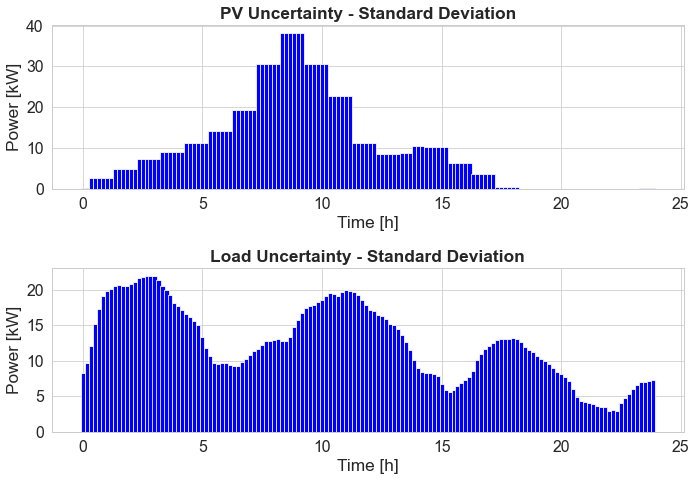

In [5]:
sn.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
steps = [str(i) for i in range(33)]


def plot_rmse_with_time(df, ax, title):
    for (hour, minute), errors in df.groupby([df.date.dt.hour, df.date.dt.minute]):
        _min = np.std(np.min(errors.filter(steps)))
        _mean = np.std(np.mean(errors.filter(steps)))
        _max = np.std(np.max(errors.filter(steps)))
        ax.bar(hour + minute/60, _mean,  width = 0.17, color = "blue", alpha=1)
        #ax.bar(hour + minute/60, _min,  width = 0.17, color = "red", alpha= 0.4)
        #ax.bar(hour + minute/60, _max,  width = 0.17, color = "green", alpha= 0.4)
        ax.set_title("{} Uncertainty - Standard Deviation".format(title), fontweight = "bold")
        ax.set_xlabel("Time [h]")
        ax.set_ylabel("Power [kW]")

plot_rmse_with_time(pv_error, ax1, "PV")
plot_rmse_with_time(load_error, ax2, "Load")

plt.tight_layout()
plt.savefig("../figs/pv_load_std.pdf", format="pdf")
plt.show()

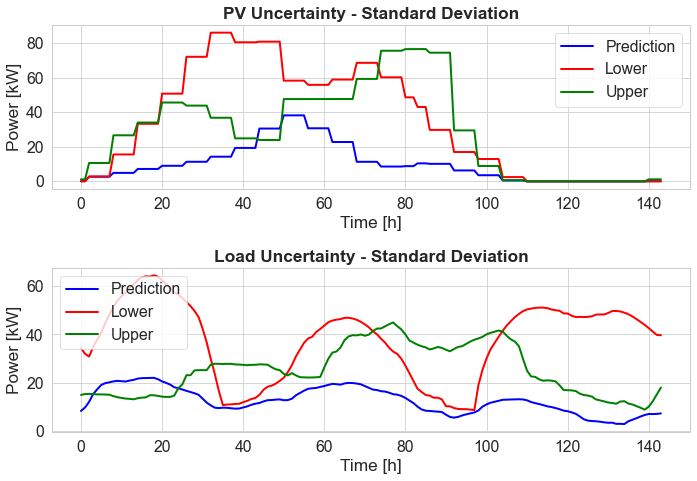

In [616]:
sn.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
steps = [str(i) for i in range(33)]


def plot_std(df, ax, title):
    _mins = []
    _means = []
    _maxs = []
    for (hour, minute), errors in df.groupby([df.date.dt.hour, df.date.dt.minute]):
        _min = np.std(np.min(errors.filter(steps)))
        _mean = np.std(np.mean(errors.filter(steps)))
        _max = np.std(np.max(errors.filter(steps)))
        
        _mins.append(_min)
        _means.append(_mean)
        _maxs.append(_max)
    ax.plot(_means, color = "blue")
    ax.plot( _mins,  color = "red")
    ax.plot( _maxs,   color = "green")
    ax.set_title("{} Uncertainty - Standard Deviation".format(title), fontweight = "bold")
    ax.set_xlabel("Time [h]")
    ax.set_ylabel("Power [kW]")
    ax.legend(["Prediction", "Lower", "Upper"])

plot_std(pv_error, ax1, "PV")
plot_std(load_error, ax2, "Load")

plt.tight_layout()
#plt.savefig("../figs/pv_load_std.png", format="png")
plt.show()

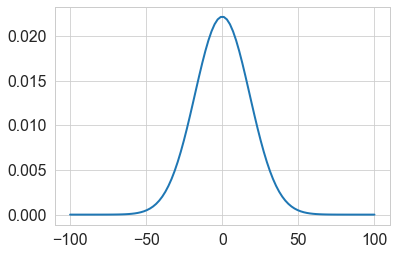

array([0.02212928, 0.02216346, 0.02212928])

In [599]:
from scipy.stats import norm
x_axis = np.linspace(-100, 100, 100)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,18))
plt.show()
norm.pdf(np.linspace(-1, 1, 3),0, 18)

[0.02510924 0.02653713 0.02510924]
15.033359599951956
[0.02237413 0.02335332 0.02237413]
17.082892203297963
[0.0204096  0.02113858 0.0204096 ]
18.872705354399333
[0.01957883 0.02021757 0.01957883]
19.73245551961453
[0.01922759 0.01983073 0.01922759]
20.117376747790306
[0.01881137 0.01937419 0.01881137]
20.591428146796662
[0.01859545 0.01913814 0.01859545]
20.845399839663582
[0.01854458 0.01908261 0.01854458]
20.90606792714947
[0.01856457 0.01910443 0.01856457]
20.88218912738721
[0.01810666 0.0186057  0.01810666]
21.441935308502252
[0.01780334 0.01827659 0.01780334]
21.828043164017835
[0.01726076 0.01769026 0.01726076]
22.551520921173694
[0.01712145 0.0175402  0.01712145]
22.74444981860065
[0.01700987 0.01742015 0.01700987]
22.90119888688323
[0.01681833 0.01721435 0.01681833]
23.174987904039313
[0.01658761 0.01696692 0.01658761]
23.512942978415108
[0.01671732 0.01710596 0.01671732]
23.321825115415436
[0.01714858 0.01756941 0.01714858]
22.706640421406313
[0.01759016 0.01804586 0.01759016

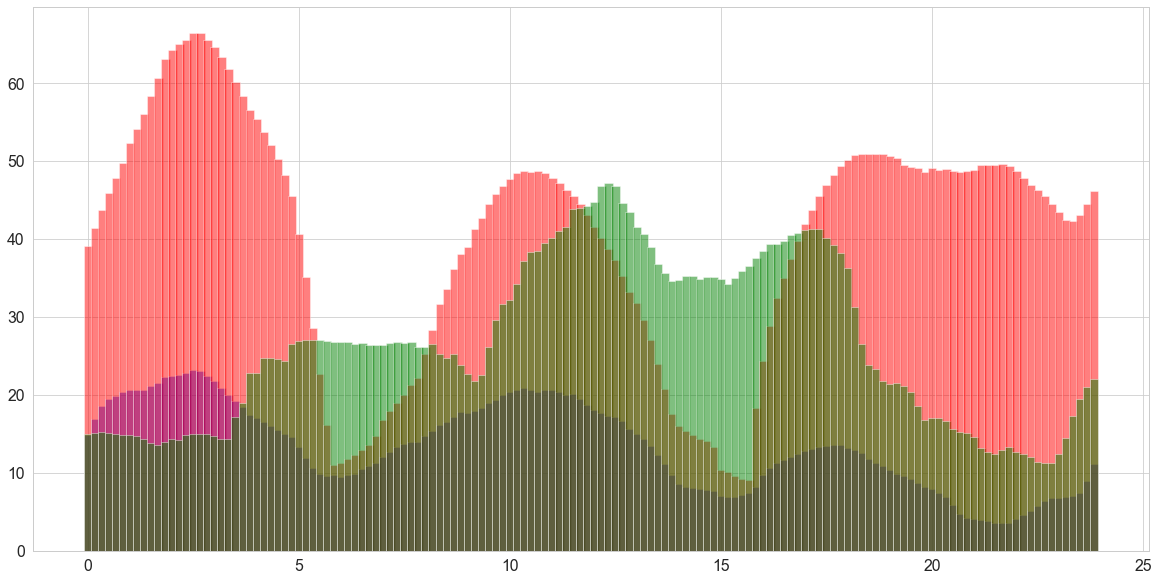

,i,type,prob,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.203111,-115.062500,-109.312500,-114.078125,-113.250000,-114.250000,-23.765625,-25.859375,...,-50.890625,-53.203125,-47.375000,-24.718750,-27.796875,-32.000000,-52.484375,-63.968750,-89.906250,-158.500000
1,0.0,1.0,0.267761,7.529687,8.868750,9.353125,9.351562,7.390625,11.982812,8.776563,...,-11.684375,-11.498437,-10.573438,2.056250,-1.331250,-5.693750,-9.987500,-26.210938,-39.421875,-53.800000
2,0.0,2.0,0.529128,55.921875,52.781250,58.609375,61.500000,59.468750,52.843750,55.890625,...,19.125000,23.765625,28.968750,27.312500,41.203125,56.312500,61.796875,25.843750,33.937500,34.031250
3,1.0,0.0,0.200868,-109.312500,-114.078125,-113.250000,-114.250000,-23.765625,-25.859375,-52.187500,...,-53.203125,-47.375000,-24.718750,-27.796875,-32.000000,-52.484375,-63.968750,-89.906250,-158.500000,-152.968750
4,1.0,1.0,0.246795,8.868750,9.353125,9.351562,7.390625,11.982812,8.776563,8.417188,...,-11.498437,-10.573438,2.056250,-1.331250,-5.693750,-9.987500,-26.210938,-39.421875,-53.800000,-49.201563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.444006,6.608553,6.745066,7.246711,8.462171,9.400493,9.468750,7.166118,...,-6.490132,-7.603618,-10.055099,-9.861020,-8.636513,2.873355,-0.574836,-5.493421,-10.267270,-25.945724
428,142.0,2.0,0.377655,54.937500,52.875000,55.921875,52.781250,58.609375,61.500000,59.468750,...,61.546875,72.281250,73.125000,67.359375,84.750000,98.156250,109.171875,116.718750,116.062500,110.812500
429,143.0,0.0,0.193330,-115.406250,-115.062500,-109.312500,-114.078125,-113.250000,-114.250000,-21.781250,...,-63.750000,-69.078125,-68.953125,-69.500000,-70.843750,-76.359375,-114.875000,-134.796875,-145.343750,-153.656250
430,143.0,1.0,0.401371,6.745066,7.246711,8.462171,9.400493,9.468750,7.166118,12.027961,...,-7.603618,-10.055099,-9.861020,-8.636513,2.873355,-0.574836,-5.493421,-10.267270,-25.945724,-37.169408


In [590]:

def create_scenario_df(N, all_errors):
    c = ["i", "type", "prob"]
    steps = [str(i) for i in range(36)]
    df = pd.DataFrame(columns = c + steps)
    i = 0
    step = 0
    plt.figure(figsize = (20,10))
    for (hour, minute), errors in all_errors.groupby([all_errors.date.dt.hour, all_errors.date.dt.minute]):
        step_errors = errors.filter(steps)
        _mean = np.mean(step_errors, axis = 0)
        _min = np.min(step_errors, axis = 0)
        _max = np.max(step_errors, axis = 0)
        stds = np.array([2/np.std(_min), 2/np.std(_max), 1/np.std(_mean)]).sum()
        
        print(norm.pdf(np.linspace(-5, 5, 3),0, _mean.std()))
        print(_mean.std())
        
        
        if _mean.std() == 0 and _min.std() == 0 and _max.std() == 0:
            df.loc[i] = _min
            df.loc[i]["i"] = step
            df.loc[i]["type"] = 0
            df.loc[i]["prob"] = 0
            i += 1
            df.loc[i] = _mean
            df.loc[i]["i"] = step
            df.loc[i]["type"] = 1
            df.loc[i]["prob"] = 1
            i += 1
            df.loc[i] = _max
            df.loc[i]["i"] = step
            df.loc[i]["type"] = 2
            df.loc[i]["prob"] = 0 
            i += 1
            step += 1
            
        else:
            df.loc[i] = _min
            df.loc[i]["i"] = step
            df.loc[i]["type"] = 0
            df.loc[i]["prob"] = (2/np.std(_min))/stds
            i += 1
            df.loc[i] = _mean
            df.loc[i]["i"] = step
            df.loc[i]["type"] = 1
            df.loc[i]["prob"] = (1/np.std(_mean))/stds
            i += 1
            df.loc[i] = _max
            df.loc[i]["i"] = step
            df.loc[i]["type"] = 2
            df.loc[i]["prob"] = (2/np.std(_max))/stds
            i += 1
            step += 1

        """
        plt.figure(figsize = (20,3))c
        plt.plot(np.mean(step_errors, axis = 0), color = "green")
        plt.plot(l_min,color = "blue")
        plt.plot(l_max, color = "red")
        plt.show()
        time.sleep(0.6)
        """


        plt.bar(hour + minute/60, np.std(_mean), width = 0.20, color = "blue", alpha= 0.5)
        plt.bar(hour + minute/60, np.std(_min), width = 0.20, color = "red", alpha=0.5)
        plt.bar(hour + minute/60, np.std(_max), width = 0.20, color = "green", alpha= 0.5)
    return df.reset_index(drop=True)



load_df = create_scenario_df(N, load_error)
plt.show() 
load_df

<ipython-input-546-6b13aa59eff4>:13: RuntimeWarning: divide by zero encountered in double_scalars
  stds = np.array([2/np.std(_min), 2/np.std(_max), 1/np.std(_mean)]).sum()


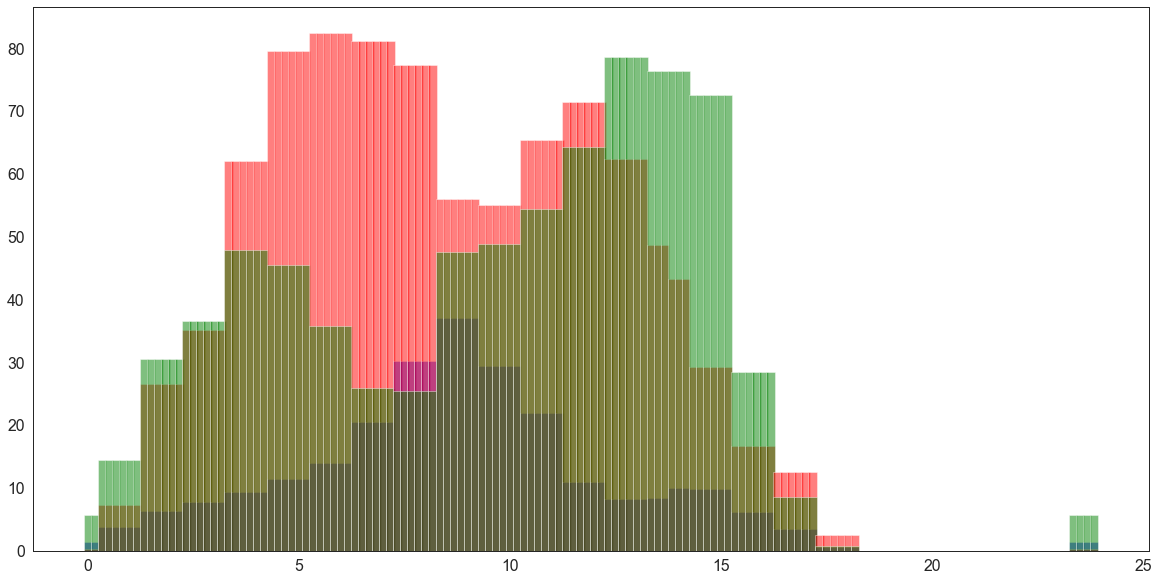

,i,type,prob,0,1,2,3,4,5,6,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.859241,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1.799246,0.000000
1,0.0,1.0,0.094830,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075000,0.881250,2.437500,2.676726,7.476726
2,0.0,2.0,0.045929,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.500000,6.750000,15.000000,17.307137,25.557137
3,1.0,0.0,0.859241,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1.799246,0.000000
4,1.0,1.0,0.094830,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075000,0.881250,2.437500,2.676726,7.476726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.095683,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.078947,0.927632,2.565789,2.699186,7.337344
428,142.0,2.0,0.045886,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.500000,6.750000,15.000000,17.307137,25.557137
429,143.0,0.0,0.858431,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1.799246,0.000000
430,143.0,1.0,0.095683,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.078947,0.927632,2.565789,2.699186,7.337344


In [547]:
pv_df = create_scenario_df(N, pv_error)
plt.show()
pv_df

In [548]:
load_df.to_csv("../src/data/load_scenarios_new.csv")
pv_df.to_csv("../src/data/pv_scenarios_new.csv")

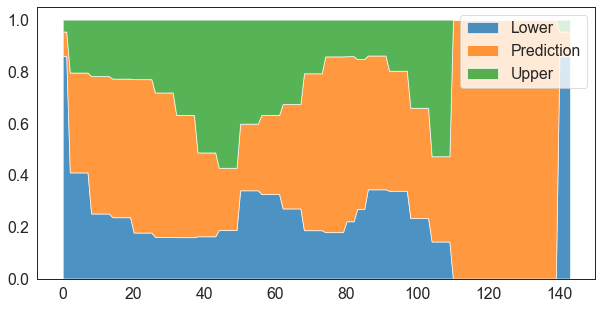

In [560]:
lower = []
pred = []
upper = []
for i, group in pv_df.groupby(["i"]):
    lower.append(group.prob.iloc[0])
    pred.append(group.prob.iloc[1])
    upper.append(group.prob.iloc[2])
    
sn.set_theme(
    context="paper",
    style="white",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)

plt.figure(figsize = (10,5))
plt.stackplot(range(len(lower)), lower, pred, upper, alpha=0.8, labels=["Lower", "Prediction", "Upper"])
plt.legend()
plt.show()

In [13]:
df = pd.read_csv("../src/data/10.5_cleaned.csv", parse_dates = ["date"]).fillna(0).set_index("date")
df

,airTemp,GHI,PAI,L,PV
date,,,,,
2021-03-17 00:00:00,0.000000,0.0,0.0,123.75000,0.0
2021-03-17 00:10:00,2.000000,0.0,0.0,129.37500,0.0
2021-03-17 00:20:00,0.000000,0.0,0.0,131.34375,0.0
2021-03-17 00:30:00,2.050000,0.0,0.0,124.50000,0.0
2021-03-17 00:40:00,2.066667,0.0,0.0,122.43750,0.0
...,...,...,...,...,...
2021-05-09 23:10:00,5.600000,0.0,0.0,104.25000,0.0
2021-05-09 23:20:00,0.000000,0.0,0.0,104.81250,0.0
2021-05-09 23:30:00,0.000000,0.0,0.0,118.87500,0.0


In [14]:
grouped = df.groupby(df.index.floor('d'), as_index = False)


load_weekday = []
load_weekend = []

def is_weekday(day):
    if day.weekday() < 5:
        return True
    return False

for day, group in grouped:
    if is_weekday(day):
        load_weekday.append(group.L.values)
    else:
        load_weekend.append(group.L.values)



load_weekday = np.asarray(load_weekday)
load_weekend = np.asarray(load_weekend)
load_weekday.shape, load_weekend.shape

((38, 144), (16, 144))

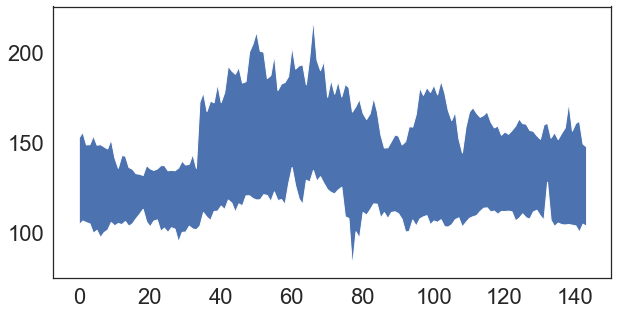

In [15]:
def get_percentiles(array, pu = 90, pl=10):

    upper = np.percentile(array, 96, axis = 0)
    lower = np.percentile(array, 4, axis = 0)
    
    return lower, upper

weekend_upper, weekend_lower = get_percentiles(load_weekend)

plt.figure(figsize = (10,5))
plt.fill_between(range(144), weekend_upper, weekend_lower)

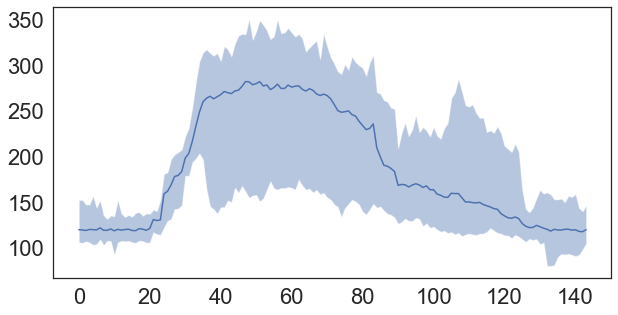

In [16]:
weekday_upper, weekday_lower = get_percentiles(load_weekday)

plt.figure(figsize = (10,5))
plt.plot(np.mean(load_weekday, axis = 0))
plt.fill_between(range(144), weekday_upper, weekday_lower, alpha = 0.4)

In [43]:
all_load_errors = pv_error.filter(steps).values.flatten()
all_pv_errors = pv_error.filter(steps).values.flatten()#[:all_load_errors.shape[0]]
all_load_errors.shape, all_pv_errors.shape

((72240,), (72240,))

In [41]:
all_load_errors = all_load_errors / all_load_errors.sum()
all_pv_errors = all_pv_errors / all_pv_errors.sum()

In [51]:
data = pd.DataFrame( data = {"PV":all_pv_errors, "Load": all_load_errors}, columns = ["PV", "Load"])

 0.000000     42918
 3.750000       162
 0.750000       138
 3.000000       120
 6.000000       102
              ...  
-56.307286        1
-82.422782        1
-7.578321         1
-60.624878        1
-75.806132        1
Name: PV, Length: 3658, dtype: int64

[]

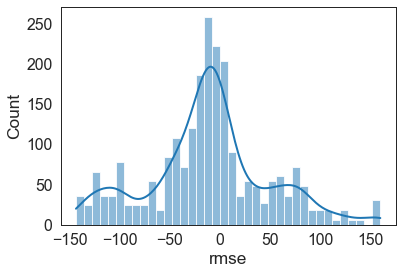

In [197]:
sn.histplot(data=pv_error, x="rmse", kde =True)
plt.plot()

[]

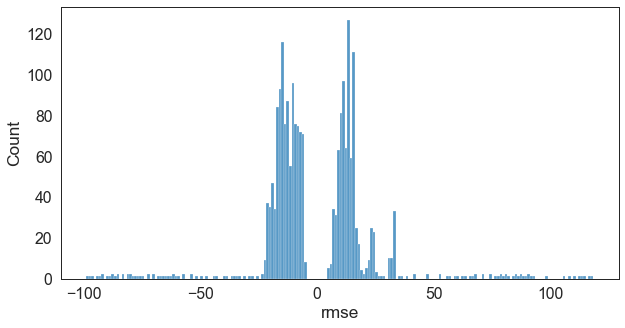

In [198]:
plt.figure(figsize = (10,5))
sn.histplot(data=load_error, x="rmse", kde =False, bins = 200, common_norm= True)
plt.plot()

[]

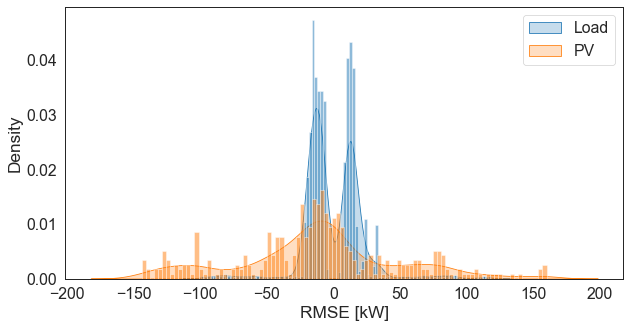

In [307]:
plt.figure(figsize = (10, 5))
n, bins, rectangles = plt.hist(load_error.rmse, 100, density=True, alpha = 0.5)
n, bins, rectangles = plt.hist(pv_error.rmse, 100, density=True, alpha = 0.5)

sn.kdeplot(data=load_error, x= "rmse", common_norm = 1, fill = True)
sn.kdeplot(data=pv_error, x= "rmse", common_norm = 1, fill = True)
plt.legend(["Load", "PV"])
plt.xlabel("RMSE [kW]")
plt.plot()

In [409]:
rmse_df = pd.DataFrame(data= {"PV":pv_error.rmse, "Load":load_error.rmse})

[]

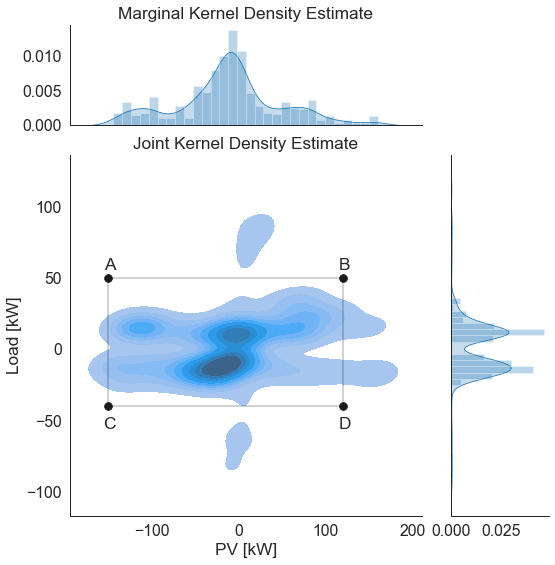

In [479]:
import matplotlib.patches as patches

sn.set_theme(
    context="paper",
    style="white",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


ax = sn.jointplot(data=rmse_df, x="PV", y="Load", kind="kde", fill =True,
                marginal_ticks=True ,height = 8, ratio = 3, dropna =True, space = 0.3, marginal_kws=dict(fill=True))


ax_joint = ax.ax_joint
pv_ax = ax.ax_marg_x
load_ax = ax.ax_marg_y

ax_joint.add_patch(patches.Rectangle((-150, -40), 270, 90, fill = False, color= "k", lw= 2, alpha = 0.2))

ax_joint.text(-155, 56, "A")
ax_joint.scatter(-150, 50, color = "k", s= 60)

ax_joint.text(115, 56, "B")
ax_joint.scatter(120, 50, s= 60, color = "k",)

ax_joint.text(-155, -56, "C")
ax_joint.scatter(-150, -40, s= 60, color = "k",)

ax_joint.text(115, -56, "D")
ax_joint.scatter(120, -40, s= 60, color = "k",)

ax_joint.set_title("Joint Kernel Density Estimate")
pv_ax.set_title("Marginal Kernel Density Estimate")
ax_joint.set_xlabel("PV [kW]")
ax_joint.set_ylabel("Load [kW]")

pv_ax.hist(pv_error.rmse, 30, density=True, alpha = 0.3)
load_ax.hist(load_error.rmse, 50, density=True, alpha = 0.3, orientation=u'horizontal')

plt.savefig("../figs/")

plt.plot()

In the plot we can see the joint and marginal kernel densities for the uncertainties $\widetilde{P}_{PV}$ and $\widetilde{P}_{L}$. The drawn-in rectangle shows is the area with highest probability to find 

In [397]:
pv_sorted = pv_error.rmse.sort_values()
load_sorted = load_error.rmse.sort_values().dropna()
pv_sorted = pv_sorted[:load_sorted.shape[0]]

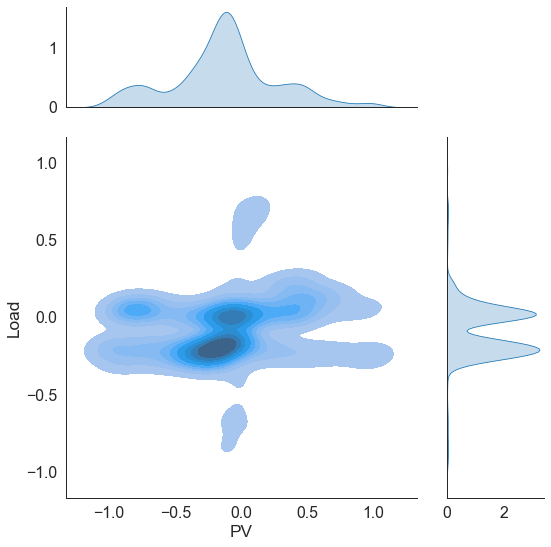

In [464]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

scaler.fit(rmse_df)
rmse_minmax = scaler.transform(rmse_df)
rmse_minmax[:,0].shape

norm = pd.DataFrame(data= {"PV":rmse_minmax[:,0],"Load":rmse_minmax[:,1]})
sn.set_theme(
    context="paper",
    style="white",
    font_scale=1.8,
    rc={"lines.linewidth": 2},
    palette="tab10",
)


ax = sn.jointplot(data=norm, x="PV", y="Load", kind="kde", fill =True,
                marginal_ticks=True ,height = 8, ratio = 3, dropna =True, space = 0.3, marginal_kws=dict(fill=True))


In [448]:
from sklearn.decomposition import PCA

<AxesSubplot:xlabel='PV', ylabel='Density'>

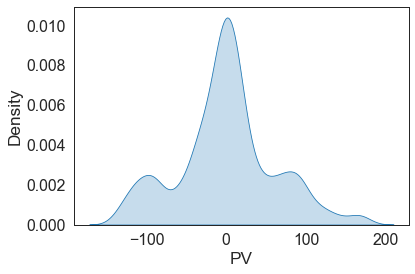

In [476]:
pca = PCA(n_components=1)
transformed = pca.fit_transform(rmse_df)
#print(pca.explained_variance_ratio_)

pca = pd.DataFrame(data= {"PV":transformed.flatten()}) #[:,0],"Load":transformed[:,1]})

#ax = sn.jointplot(data=pca, x="PV", y="Load", kind="kde", fill =True,
#                marginal_ticks=True ,height = 8, ratio = 3, dropna =True, space = 0.3, marginal_kws=dict(fill=True))

sn.kdeplot(data=pca, x= "PV", common_norm = 1, fill = True)